<a href="https://colab.research.google.com/github/hrbolek/coronavirus/blob/master/czech_open_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import json
import requests

In [0]:
url = 'https://onemocneni-aktualne.mzcr.cz/api/v1/covid-19/osoby.json'
response = requests.request("GET", url)


In [0]:
from functools import reduce
def sumFromStr(series):
  numbers = series.astype(float).tolist()
  return reduce(lambda x, y: x + 1, numbers)

# Vývoj počtu nově nakažených

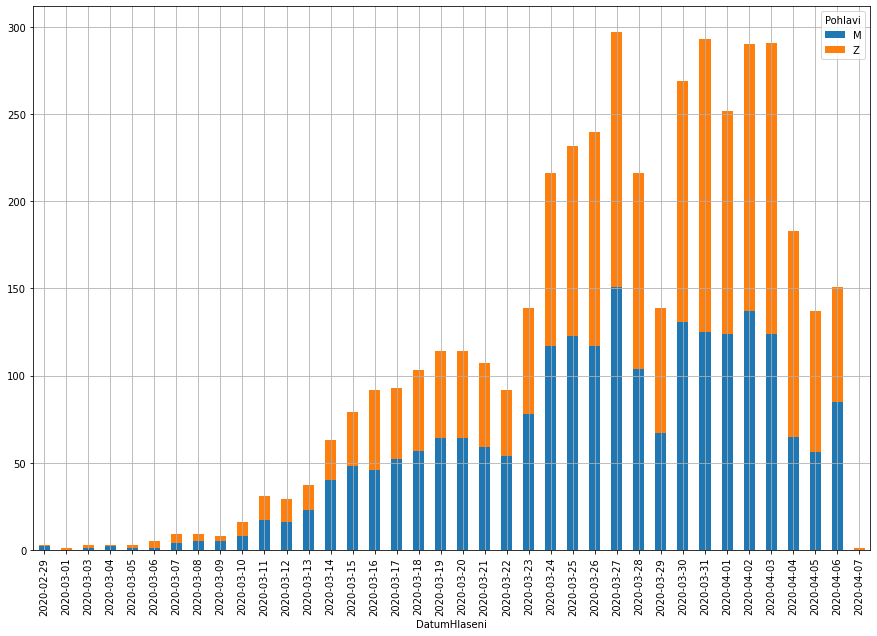

In [51]:
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (15,10)

data = response.json()
df = pd.DataFrame(data)
#display(df)
#df.groupby(['KHS']).count()
#df.pivot_table(values='Import', index=['Pohlavi', 'KHS'], columns=['ImportZemeCsuKod'], aggfunc=sumFromStr)
#df.pivot_table(values='Import', index=['DatumHlaseni'], columns=['KHS'], aggfunc=sumFromStr)

df.groupby(['DatumHlaseni','Pohlavi']).size().unstack().plot(kind='bar',stacked=True)
plt.grid(which='both')
plt.show()

# Celkový vývoj počtu nakažených

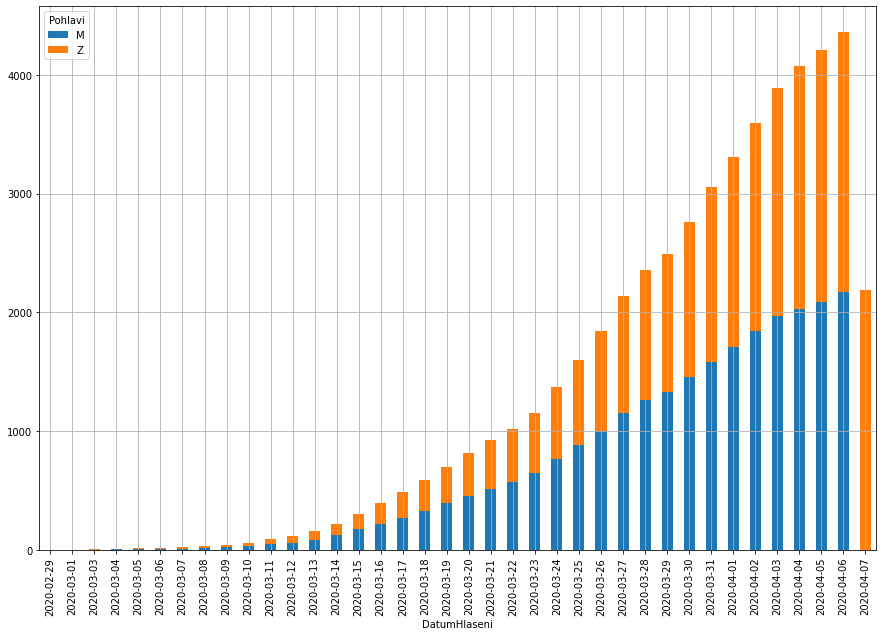

In [52]:
df.groupby(['DatumHlaseni','Pohlavi']).size().groupby('Pohlavi').cumsum().unstack().plot(kind='bar',stacked=True)
plt.grid(which='both')
plt.show()